<a href="https://colab.research.google.com/github/arsal1947/California-Housing-ML-Model/blob/main/Heart_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#@title Step 0: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc


In [19]:
#@title Step 1: Load dataset
url = "heart.csv"  # Or upload the CSV file to Colab and use its path
data = pd.read_csv(url)
data.head()  # Display first 5 rows


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [20]:
#@title Step 2: Pick features and target
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
            'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = data[features].copy()
y = data['target'].to_numpy().reshape(-1,1)


In [21]:
#@title Step 3: One-hot encode categorical features
categorical_feats = ['cp', 'slope', 'thal']
X = pd.get_dummies(X, columns=categorical_feats)
X.head()  # Show first 5 rows after encoding


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,52,1,125,212,0,1,168,0,1.0,2,...,False,False,False,False,False,True,False,False,False,True
1,53,1,140,203,1,0,155,1,3.1,0,...,False,False,False,True,False,False,False,False,False,True
2,70,1,145,174,0,1,125,1,2.6,0,...,False,False,False,True,False,False,False,False,False,True
3,61,1,148,203,0,1,161,0,0.0,1,...,False,False,False,False,False,True,False,False,False,True
4,62,0,138,294,1,1,106,0,1.9,3,...,False,False,False,False,True,False,False,False,True,False


In [22]:
#@title Step 4: Normalize numerical features
numerical_feats = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X[numerical_feats] = (X[numerical_feats] - X[numerical_feats].mean()) / X[numerical_feats].std()

# Convert to fully numeric NumPy array
X = X.astype(float).to_numpy()


In [24]:
#@title Step 5: Initialize weights and bias
np.random.seed(42)
w = np.random.randn(X.shape[1],1) * 0.01
b = 0.0


In [25]:
#@title Step 6: Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [26]:
#@title Step 7: Define binary cross-entropy loss
def compute_loss(y, y_hat):
    m = y.shape[0]
    loss = - (1/m) * np.sum(y * np.log(y_hat + 1e-8) + (1-y) * np.log(1 - y_hat + 1e-8))
    return loss


In [28]:
#@title Step 8: Gradient descent parameters
learning_rate = 0.05
epochs = 2000
m = X.shape[0]


In [29]:
#@title Step 9: Training loop
for i in range(epochs):
    z = np.dot(X, w) + b
    y_hat = sigmoid(z)

    dz = y_hat - y
    dw = (1/m) * np.dot(X.T, dz)
    db = (1/m) * np.sum(dz)

    w -= learning_rate * dw
    b -= learning_rate * db

    if i % 200 == 0:
        loss = compute_loss(y, y_hat)
        print(f"Epoch {i}: Loss = {loss:.4f}")


Epoch 0: Loss = 0.6961
Epoch 200: Loss = 0.3810
Epoch 400: Loss = 0.3591
Epoch 600: Loss = 0.3516
Epoch 800: Loss = 0.3480
Epoch 1000: Loss = 0.3458
Epoch 1200: Loss = 0.3443
Epoch 1400: Loss = 0.3432
Epoch 1600: Loss = 0.3423
Epoch 1800: Loss = 0.3415


In [30]:
#@title Step 10: Predictions
y_pred = (y_hat >= 0.5).astype(int)


In [31]:
#@title Step 11: Metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
print(f"\nTraining Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")



Training Accuracy: 84.78%
Precision: 0.83
Recall: 0.89


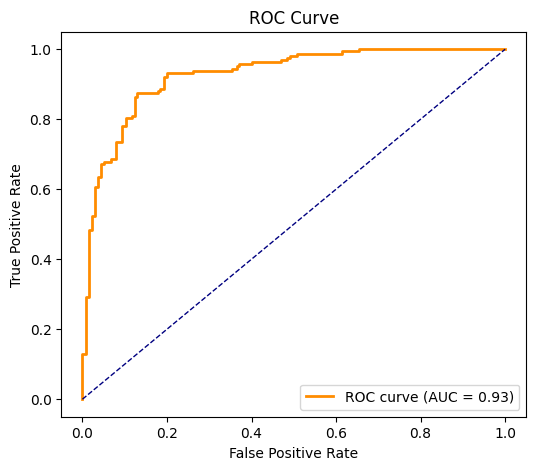

In [32]:
#@title Step 12: ROC curve & AUC
fpr, tpr, thresholds = roc_curve(y, y_hat)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#@title Step 13: Predict Heart Disease for Custom Input
# Ask user to input values for each feature
print("Enter the following patient details:")

# Numerical features
age = float(input("Age: "))
sex = float(input("Sex (0=Female, 1=Male): "))
trestbps = float(input("Resting Blood Pressure: "))
chol = float(input("Cholesterol: "))
fbs = float(input("Fasting Blood Sugar > 120 mg/dl? (0=No, 1=Yes): "))
restecg = float(input("Resting ECG (0,1,2): "))
thalach = float(input("Max Heart Rate Achieved: "))
exang = float(input("Exercise Induced Angina (0=No, 1=Yes): "))
oldpeak = float(input("ST Depression Induced by Exercise: "))
ca = float(input("Number of Major Vessels Colored by Fluoroscopy (0-3): "))

# Categorical features (one-hot encoding handled manually)
cp = int(input("Chest Pain Type (0-3): "))
slope = int(input("Slope of ST Segment (0-2): "))
thal = int(input("Thalassemia (1=Normal, 2=Fixed Defect, 3=Reversible Defect): "))

# Create input vector matching training data
user_input = np.zeros(X.shape[1])

# Fill numerical features (normalize using training mean/std)
num_feats = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
num_vals = [age, trestbps, chol, thalach, oldpeak]
for idx, col in enumerate(numerical_feats):
    user_input[idx] = (num_vals[idx] - data[col].mean()) / data[col].std()

# Fill binary features
user_input[list(data.columns).index('sex')] = sex
user_input[list(data.columns).index('fbs')] = fbs
user_input[list(data.columns).index('restecg')] = restecg
user_input[list(data.columns).index('exang')] = exang
user_input[list(data.columns).index('ca')] = ca

# One-hot encode cp, slope, thal
# cp: columns cp_0, cp_1, cp_2, cp_3
user_input[13 + cp] = 1  # Adjust index based on one-hot encoding order in your X

# slope: columns slope_0, slope_1, slope_2
user_input[17 + slope] = 1

# thal: columns thal_1, thal_2, thal_3
user_input[20 + (thal-1)] = 1  # thal starts from 1

# Reshape to column vector
user_input = user_input.reshape(1, -1)

# Predict probability and class
prob = sigmoid(np.dot(user_input, w) + b)[0][0]
pred_class = 1 if prob >= 0.5 else 0

print(f"\nPredicted Probability of Heart Disease: {prob:.2f}")
print(f"Predicted Class: {'Heart Disease' if pred_class==1 else 'No Heart Disease'}")
